<a href="https://colab.research.google.com/github/papagorgio23/Python101/blob/master/Cox_Regression_with_Time_Dependent_Covariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install lifelines

     |████████████████████████████████| 337kB 2.8MB/s 


In [ ]:
from lifelines import CoxTimeVaryingFitter
#import pandas as pd
import numpy as np


In [ ]:
from google.cloud import bigquery
import pandas as pd
from google.colab import auth
import pandas_gbq as gbq

#authenticate user for GBQ and google cloud storage
auth.authenticate_user()

# Set project id for querying GBQ and using google cloud storage 
project_id = 'ffn-dw-bigquery-prd'


In [ ]:
sql = """
select * from 
    `ffn-dw-bigquery-prd.Jeff_Franco.FirstSetRetention`
"""

#Query GBQ to verify that the table that was create exists and looks as expected
df = pd.read_gbq(sql, project_id=project_id, dialect='standard')
df.head(10)

,client_key,start,stop,Event,FirstSet
0,0013900001a3zRjAAI,3.0,3.5,True,1
1,0013900001a3zziAAA,1.0,1.5,True,1
2,0013900001a40fGAAQ,3.0,3.5,True,1
3,0013900001a42RxAAI,4.0,4.5,True,1
4,0013900001a472UAAQ,7.0,7.5,True,1
5,0013900001a4AZtAAM,1.0,1.5,True,1
6,0013900001a4AykAAE,1.0,1.5,True,1
7,0013900001a4AyuAAE,8.0,8.5,False,1
8,0013900001a4C33AAE,8.0,8.5,False,1
9,0013900001a4F2xAAE,2.0,2.5,True,1


Iteration 5: norm_delta = 0.00000, step_size = 1.00000, ll = -739620.85590, newton_decrement = 0.00000, seconds_since_start = 2.2Convergence completed after 5 iterations.
<lifelines.CoxTimeVaryingFitter: fitted with 271593 periods, 148391 subjects, 64152 events>
         event col = 'Event'
number of subjects = 148391
 number of periods = 271593
  number of events = 64152
    log-likelihood = -739620.86
  time fit was run = 2019-08-30 21:37:37 UTC

---
          coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
FirstSet -1.46      0.23      0.01           -1.48           -1.43                0.23                0.24

               z      p  -log2(p)
FirstSet -123.48 <0.005       inf
---
Log-likelihood ratio test = 15689.68 on 1 df, -log2(p)=inf


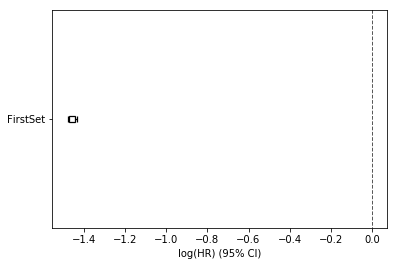

In [ ]:
#fit the model

ctv = CoxTimeVaryingFitter()
ctv.fit(df, id_col="client_key", event_col="Event", start_col="start", stop_col="stop", show_progress=True)
ctv.print_summary()
ctv.plot()

$$S(t)=\exp \left( -\int_0^t{\lambda_0(s) \exp(\beta (Z(s)-\mu_s))ds} \right)$$

$$S(t)=\exp \left( -\int_0^t{\lambda_0(s) \exp(-1.46 (0-0.827))ds} \right)$$

$$S(t)=e^{-3.359} \exp \left( -\int_0^t{\lambda_0(s) ds} \right)$$

$$S(t)=e^{-3.359} H_0(t)$$

In [ ]:
df2 = df[['client_key','FirstSet']].groupby('client_key').sum()
df2.mean()

FirstSet    0.830253
dtype: float64

In [ ]:
ch = ctv.baseline_cumulative_hazard_
ch

,baseline hazard
0.5,0.002976
1.0,0.032717
1.5,0.032988
2.0,0.067268
2.5,0.067522
3.0,0.101898
3.5,0.102328
4.0,0.136360
4.5,0.136770
5.0,0.171599


In [ ]:
np.exp(-1.46*-0.826)

3.339963904853086

In [ ]:
CumulativeHazard_NFS = ch * np.exp(-1.46*-0.826)

In [ ]:
Survival_NFS = np.exp(-1*CumulativeHazard_NFS)
Survival_NFS

,baseline hazard
0.5,0.990111
1.0,0.896486
1.5,0.895674
2.0,0.798778
2.5,0.798101
3.0,0.711532
3.5,0.710511
4.0,0.634170
4.5,0.633304
5.0,0.563755


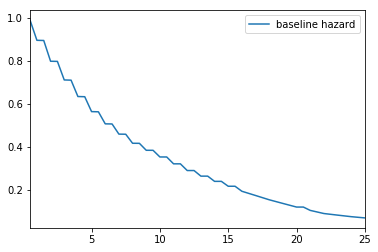

In [ ]:
Survival_NFS.plot()